In [1]:
import torch
from torch.optim import SGD, Adam
import torch.nn as nn


from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import numpy as np

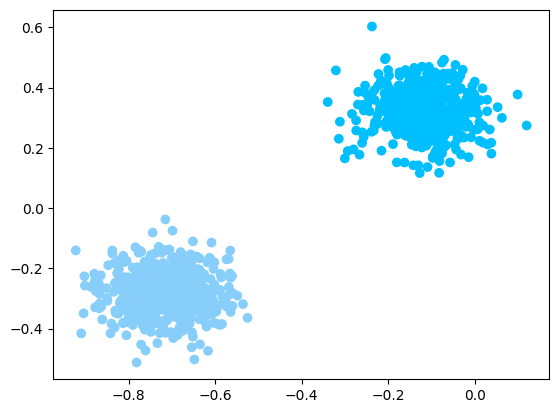

In [2]:
X,y=make_blobs(n_samples=1000, centers=2, random_state=1)
for k, label in enumerate(y):
    if label==0:
        y[k]=-1
max_X_norm=max([np.linalg.norm(x) for x in X])
X=X/max_X_norm
(trainX, testX, trainY, testY) = train_test_split(X, y,test_size=0.15, random_state=95)
trainX = torch.from_numpy(trainX).float()
testX = torch.from_numpy(testX).float()
trainY = torch.from_numpy(trainY).float()
testY = torch.from_numpy(testY).float()
colors=[]
for label in y:
    if label==1:
        colors.append('lightskyblue')
    else:
        colors.append('deepskyblue')
plt.scatter(X[:,0],X[:,1],c=colors)

In [3]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, input_dim=2, output_dim=1):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim, bias=False)

  def forward(self, x):
    x = self.linear(x)
    return x

In [4]:
def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])
		
BATCH_SIZE = 1
EPOCHS = 200
LR = 1e-2

In [5]:
model=LinearClassifier()

In [6]:
opt = Adam(model.parameters(), lr=LR)
lossFunc = nn.L1Loss()

for epoch in range(0, 20):
	trainLoss = 0
	trainAcc = 0
	samples = 0
	model.train()
	# loop over the current batch of data
	for (batchX, batchY) in next_batch(trainX, trainY, BATCH_SIZE):
		predictions = model(batchX)
		loss = lossFunc(predictions, batchY.long())
		opt.zero_grad()
		loss.backward()
		opt.step()
		trainLoss += loss.item() * batchY.size(0)
		trainAcc += (torch.sign(predictions) == batchY).sum().item()
		samples += batchY.size(0)
	print("Epoch: {} train loss: {:.3f} train accuracy: {:.3f}".format(epoch+1,trainLoss / samples,trainAcc / samples))

c:\Users\thoma\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 1 train loss: 0.297 train accuracy: 0.976
Epoch: 2 train loss: 0.179 train accuracy: 1.000
Epoch: 3 train loss: 0.179 train accuracy: 1.000
Epoch: 4 train loss: 0.178 train accuracy: 1.000
Epoch: 5 train loss: 0.178 train accuracy: 1.000
Epoch: 6 train loss: 0.178 train accuracy: 1.000
Epoch: 7 train loss: 0.179 train accuracy: 1.000
Epoch: 8 train loss: 0.179 train accuracy: 1.000
Epoch: 9 train loss: 0.179 train accuracy: 1.000
Epoch: 10 train loss: 0.179 train accuracy: 1.000
Epoch: 11 train loss: 0.179 train accuracy: 1.000
Epoch: 12 train loss: 0.179 train accuracy: 1.000
Epoch: 13 train loss: 0.179 train accuracy: 1.000
Epoch: 14 train loss: 0.179 train accuracy: 1.000
Epoch: 15 train loss: 0.179 train accuracy: 1.000
Epoch: 16 train loss: 0.179 train accuracy: 1.000
Epoch: 17 train loss: 0.179 train accuracy: 1.000
Epoch: 18 train loss: 0.178 train accuracy: 1.000
Epoch: 19 train loss: 0.178 train accuracy: 1.000
Epoch: 20 train loss: 0.178 train accuracy: 1.000


In [10]:
testLoss = 0
testAcc = 0
samples = 0
model.eval()
with torch.no_grad():
    for batchX, batchY in next_batch(testX, testY, len(testX)):
        predictions = model(batchX)
        margin=min(abs(predictions.max(1)[0]))

In [11]:
print(margin)

tensor(0.3027)


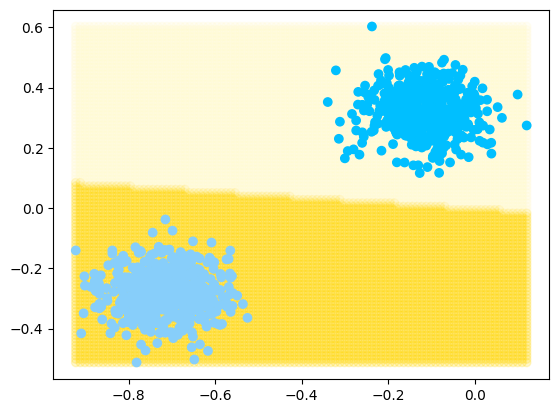

In [16]:
import numpy as np
X_boundary=[]
for x_1 in (np.linspace(min(X[:,0]),max(X[:,0]),100)):
    for x_2 in (np.linspace(min(X[:,1]),max(X[:,1]),100)):
        X_boundary.append([x_1,x_2])
X_boundary=torch.tensor(X_boundary, dtype=torch.float32)
with torch.inference_mode():
    predictions=torch.sign(model(X_boundary))
colors_grid=[]
for prediction in predictions.tolist():
    if prediction[0]==1:
        colors_grid.append('gold')
    else:
        colors_grid.append('lemonchiffon')
plt.scatter(X_boundary[:,0].tolist(),X_boundary[:,1].tolist(),c=colors_grid, alpha=0.2)
plt.scatter(X[:,0].tolist(),X[:,1].tolist(),c=colors)

In [20]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.2710, -2.9036]], requires_grad=True)


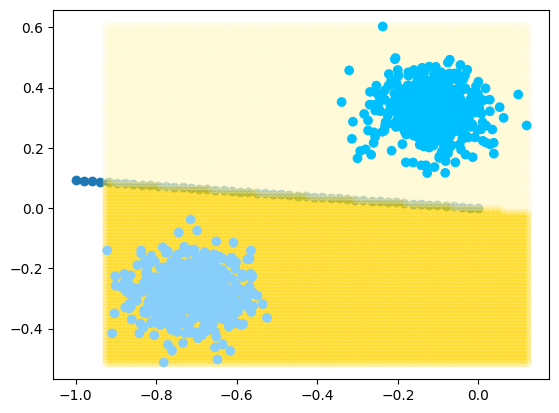

In [22]:
x=np.linspace(-1,0,50)
plt.scatter(x,-0.271*x/2.9036)
plt.scatter(X_boundary[:,0].tolist(),X_boundary[:,1].tolist(),c=colors_grid, alpha=0.2)
plt.scatter(X[:,0].tolist(),X[:,1].tolist(),c=colors)

In [23]:
p_1=8*(-0.2710)**2/margin**2
p_2=8*(-2.9036)**2/margin**2
print(p_1,p_2)

tensor(6.4100) tensor(735.8615)
